**Table of contents**<a id='toc0_'></a>    
- 1. [Problem 1: Optimal taxation with government consumption](#toc1_)    
- 2. [Problem 2: Labor adjustment costs](#toc2_)    
- 3. [Problem 3: Global optimizer with refined multi-start](#toc3_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [1]:
import sympy as sm
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2


## 1. <a id='toc1_'></a>[Problem 1: Optimal taxation with government consumption](#toc0_)


Consider a worker choosing hours of labor, $L\in[0,24]$, to maximize utility: 

$$
\begin{align*}
V(w,\tau,G)&=\max_{L\in[0,24]}\ln\left(C^{\alpha}G^{1-\alpha}\right)-\nu\frac{L^{2}}{2}\\&\text{s.t.}\\&C=\kappa+(1-\tau)wL
\end{align*}
$$

where 

* $C$ is *private* consumption with weight $\alpha\in(0,1)$.
* $\kappa > 0$ is the *free private* consumption component.
* $C = (1-\tau)wL$ is the *costly private* consumption component.
* $w > 0 $ is the real wage.
* $\tau \in (0,1)$ is the labor-income tax rate.
* $G > 0 $ is *government* consumption with weight $1-\alpha$.
* $\nu > 0$ is the disutility of labor scaling factor


The baseline parameters are:

$$
\begin{align*}
\alpha &= 0.5\\
\kappa &= 1.0\\
\nu &= \frac{1}{2\cdot16^2} \\
w &= 1.0 \\ 
\tau &= 0.30 \\
\end{align*}
$$

**Question 1:** Verify that the optimal labor supply choice is $L^{\star}(\tilde{w}) =\frac{-\kappa+\sqrt{\kappa^{2}+4\frac{\alpha}{\nu}\tilde{w}^2}}{2\tilde{w}}$, where $\tilde{w} = (1-\tau)w$, for $G\in\left\{1.0 , 2.0\right\}$.

In [2]:
C = sm.symbols('C') 
k = sm.symbols('kappa')
w = sm.symbols('omega')
t = sm.symbols('tau')
G = sm.symbols('G')
v = sm.symbols('nu')
L = sm.symbols('L')
a = sm.symbols('alpha')
w_tilde = sm.symbols('omegatilde')
L_star = sm.symbols('L^*')

In [3]:
#q1_solution = sm.Eq((-k+(k**2+4*a/v*w_tilde**2)**0.5)/(2*w_tilde),L_star)
#q1_solution

In [4]:
utility = sm.log(C**a*G**(1-a))-v*(L**2)/2
utility

-L**2*nu/2 + log(C**alpha*G**(1 - alpha))

In [5]:
# define the budget constraint as an equality
consumption_constraint = sm.Eq(k+w_tilde*L,C)
consumption_constraint

Eq(L*omegatilde + kappa, C)

In [6]:
C_from_constraint = sm.solve(consumption_constraint,C)
C_from_constraint[0]

L*omegatilde + kappa

In [7]:
utility_subs = utility.subs(C,C_from_constraint[0])
utility_subs

-L**2*nu/2 + log(G**(1 - alpha)*(L*omegatilde + kappa)**alpha)

In [8]:
print(sm.latex(utility_subs))

- \frac{L^{2} \nu}{2} + \log{\left(G^{1 - \alpha} \left(L \tilde{\omega} + \kappa\right)^{\alpha} \right)}


In [9]:
foc = sm.diff(utility_subs, L)
foc

G**(1 - alpha)*G**(alpha - 1)*alpha*omegatilde/(L*omegatilde + kappa) - L*nu

In [10]:
sol = sm.solve(sm.Eq(foc,0), L)[1]
sol_opt = sm.Eq(L_star,sol)
sol_opt

Eq(L^*, (-kappa*nu + sqrt(nu*(4*alpha*omegatilde**2 + kappa**2*nu)))/(2*nu*omegatilde))

**Question 2:** Illustrate how $L^{\star}(\tilde{w})$ depends on $w$.

In [11]:
w_tilde_eq = (1-t)*w


In [26]:
L_star_subs = sol.subs(w_tilde,w_tilde_eq)
L_star_subs

(-kappa*nu + sqrt(nu*(4*alpha*omega**2*(1 - tau)**2 + kappa**2*nu)))/(2*nu*omega*(1 - tau))

In [27]:
print(sm.latex(L_star_subs))

\frac{- \kappa \nu + \sqrt{\nu \left(4 \alpha \omega^{2} \left(1 - \tau\right)^{2} + \kappa^{2} \nu\right)}}{2 \nu \omega \left(1 - \tau\right)}


In [13]:
# we lambdify L
solution_function = sm.lambdify((w,v,k,a,t),L_star_subs)
solution_function

<function _lambdifygenerated(omega, nu, kappa, alpha, tau)>

In [14]:
w_vec = np.linspace(0.1,200,100)

In [15]:
a_val = 0.5
k_val = 1
v_val = 1/(2*16**2)
w_val = 1
t_val = 0.3

# run solution function with vector of w
solutions = solution_function(w_vec,v_val, k_val, a_val, t_val)

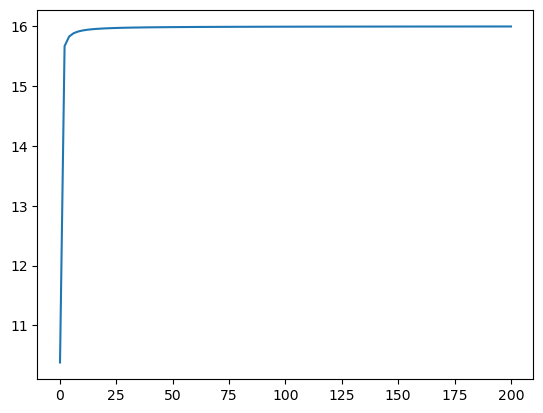

In [16]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(w_vec,solutions)


We now consider a government, who chooses $\tau$ and spend all of the taxes on government consumption so:

$$
G = \tau w L^{\star}((1-\tau)w)
$$

**Question 3:** Plot the implied $L$, $G$ and worker utility for a grid of $\tau$-values.


In [17]:
t_vec = np.linspace(0.1,0.9,100)

In [18]:
a_val = 0.5
k_val = 1
v_val = 1/(2*16**2)
w_val = 1
t_val = 0.3

# run solution function with vector of t
optimal_L = solution_function(w_val,v_val, k_val, a_val, t_vec)
optimal_L

array([15.4540866 , 15.44922871, 15.44428361, 15.43924894, 15.43412224,
       15.42890096, 15.42358246, 15.41816401, 15.41264277, 15.40701577,
       15.40127995, 15.39543212, 15.38946898, 15.38338708, 15.37718284,
       15.37085253, 15.36439228, 15.35779803, 15.35106558, 15.34419054,
       15.33716833, 15.32999418, 15.32266311, 15.31516992, 15.30750916,
       15.29967517, 15.29166198, 15.28346341, 15.27507292, 15.26648372,
       15.25768866, 15.24868026, 15.23945066, 15.22999162, 15.22029449,
       15.21035015, 15.20014906, 15.18968113, 15.17893578, 15.16790182,
       15.15656749, 15.14492035, 15.1329473 , 15.12063446, 15.10796719,
       15.09492995, 15.08150633, 15.0676789 , 15.05342918, 15.03873754,
       15.02358314, 15.00794377, 14.9917958 , 14.97511405, 14.95787164,
       14.94003985, 14.92158797, 14.90248314, 14.88269013, 14.86217112,
       14.84088548, 14.81878949, 14.79583608, 14.77197442, 14.74714962,
       14.72130227, 14.694368  , 14.66627691, 14.63695301, 14.60

In [21]:
optimal_G = t_vec*w_val*optimal_L*((1-t_vec)*w_val)
optimal_G

array([1.39086779, 1.48929556, 1.58563518, 1.67988669, 1.77205014,
       1.86212556, 1.95011301, 2.03601253, 2.11982416, 2.20154796,
       2.28118397, 2.35873225, 2.43419287, 2.50756586, 2.57885131,
       2.64804926, 2.71515979, 2.78018296, 2.84311884, 2.90396751,
       2.96272905, 3.01940354, 3.07399106, 3.1264917 , 3.17690555,
       3.22523272, 3.2714733 , 3.31562739, 3.35769512, 3.39767659,
       3.43557193, 3.47138128, 3.50510475, 3.5367425 , 3.56629467,
       3.59376143, 3.61914293, 3.64243935, 3.66365088, 3.6827777 ,
       3.69982003, 3.71477808, 3.72765208, 3.73844227, 3.7471489 ,
       3.75377225, 3.75831261, 3.76077028, 3.76114559, 3.75943888,
       3.75565053, 3.74978092, 3.74183047, 3.73179964, 3.71968891,
       3.70549877, 3.68922979, 3.67088256, 3.6504577 , 3.6279559 ,
       3.6033779 , 3.57672448, 3.5479965 , 3.5171949 , 3.48432067,
       3.44937491, 3.41235879, 3.37327362, 3.3321208 , 3.28890187,
       3.24361852, 3.19627261, 3.14686618, 3.09540148, 3.04188

In [22]:
optimal_U = np.log((k_val+(1-t_vec)*w_val*optimal_L)**a_val*optimal_G**(1-a_val))-v_val*optimal_L**2/2
optimal_U

array([1.28270442, 1.31268629, 1.33978581, 1.36437886, 1.38676986,
       1.40720874, 1.42590314, 1.44302737, 1.45872911, 1.47313454,
       1.4863522 , 1.49847614, 1.50958828, 1.5197604 , 1.52905565,
       1.53752985, 1.54523256, 1.55220787, 1.55849517, 1.56412974,
       1.56914324, 1.57356415, 1.57741814, 1.58072836, 1.58351572,
       1.58579911, 1.58759562, 1.5889207 , 1.58978828, 1.59021098,
       1.59020012, 1.58976591, 1.58891749, 1.58766301, 1.58600972,
       1.58396399, 1.58153143, 1.57871683, 1.57552432, 1.5719573 ,
       1.56801854, 1.56371016, 1.55903367, 1.55399001, 1.5485795 ,
       1.54280192, 1.53665647, 1.53014179, 1.52325598, 1.51599655,
       1.50836047, 1.50034411, 1.49194329, 1.48315321, 1.47396846,
       1.464383  , 1.45439014, 1.44398249, 1.43315195, 1.42188967,
       1.41018603, 1.39803055, 1.38541187, 1.3723177 , 1.35873472,
       1.34464856, 1.33004369, 1.31490332, 1.29920932, 1.2829421 ,
       1.2660805 , 1.24860163, 1.23048069, 1.21169083, 1.19220

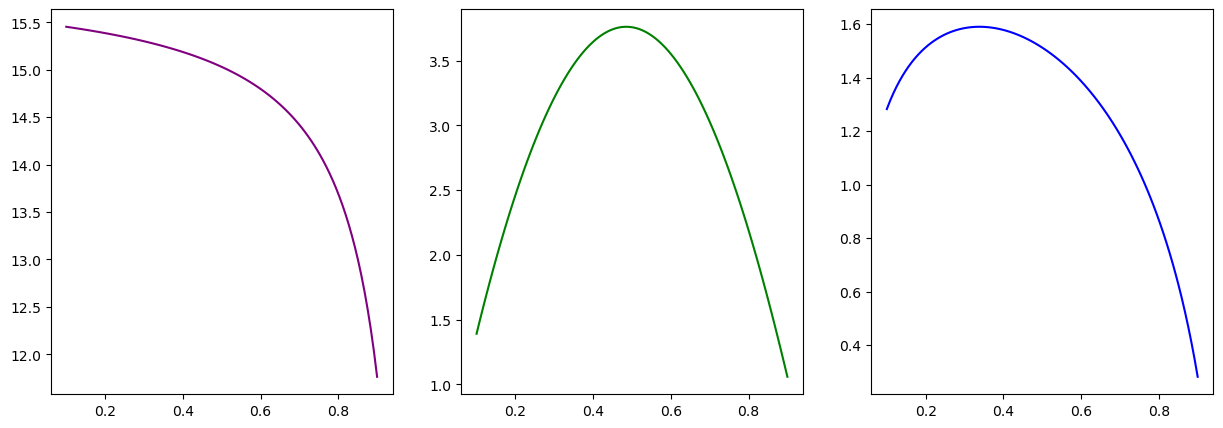

In [23]:
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(1,3,1)
ax.plot(t_vec,optimal_L, c="purple")
ax = fig.add_subplot(1,3,2)
ax.plot(t_vec,optimal_G, c="green")
ax = fig.add_subplot(1,3,3)
ax.plot(t_vec,optimal_U,  c="blue")

**Question 4:** Find the socially optimal tax rate $\tau^{\star}\in(0,1)$ maximizing worker utility. Illustrate your result.

In [32]:
import numpy as np
from scipy.optimize import minimize

def objective_function(t):
    optimal_L = (-k_val * v_val + np.sqrt(v_val * (4 * a_val * w_val**2 * (1 - t)**2 + k_val**2 * v_val))) / (2 * v_val * w_val * (1 - w_val))
    optimal_G = t * w_val * optimal_L * ((1 - t) * w_val)
    U = np.log((k_val + (1 - t) * w_val * optimal_L)**a_val * optimal_G**(1 - a_val)) - v_val * optimal_L**2 / 2
    return -U

def constraint(t):
    return C - k_val + (1 - t) * w_val * optimal_L

def positivity_constraint(x):
    optimal_L, optimal_G = x
    return [optimal_L, optimal_G]

# Set the values for k_val, w_val, a_val, v_val, and C
k_val = 1.0
w_val = 1.0
a_val = 0.5
v_val = 1/2*16**2

# Set the initial guess for t
initial_guess = 0.5

# Define the bounds for t (assuming it's between 0 and 1)
bounds = [(0, 1)]

# Define the constraint
constraint = {'type': 'eq', 'fun': constraint}

# Define the positivity constraint
positivity_constraint = {'type': 'ineq', 'fun': positivity_constraint}

# Use the minimize function to solve the optimization problem
result = optimize.minimize(objective_function, initial_guess, bounds=bounds, constraints=[constraint, positivity_constraint])

# Get the optimized value for t
optimized_t = result.x[0]

# Calculate optimal_L and optimal_G using the optimized t
optimal_L = (-k_val * v_val + np.sqrt(v_val * (4 * a_val * w_val**2 * (1 - optimized_t)**2 + k_val**2 * v_val))) / (2 * v_val * w_val * (1 - w_val))
optimal_G = optimized_t * w_val * optimal_L * ((1 - optimized_t) * w_val)

# Print the optimized values
print("Optimized t:", optimized_t)
print("Optimal L:", optimal_L)
print("Optimal G:", optimal_G)


ValueError: not enough values to unpack (expected 2, got 1)

In [ ]:
def objective(k_val, t_val, w_val, optimal_L, a_val, optimal_G, v_val):
    return -np.log((k_val+(1-t_val)*w_val*optimal_L)**a_val*optimal_G**(1-a_val))-v_val*optimal_L**2/2

def eq_constraint(C,k_val,t_val,w_val,optimal_L):
    return C - k_val+(1-t_val)*w_val*optimal_L 

# a. setup
bound = [(0,1)]
#ineq_con = {'type': 'ineq', 'fun': ineq_constraint} 
eq_con = {'type': 'eq', 'fun': eq_constraint, 'args': (0.4,  # Example value for t_val
                                                       1.0,  # Example value for C
                                                       2.0,  # Example value for k_val
                                                       3.0,  # Example value for w_val
                                                       4.0)}

# b. call optimizer
t_0 = (0.4,) # fit the equality constraint
result = optimize.minimize(objective,t_0,
                             method='SLSQP',
                             bounds=bound,
                             constraints=[eq_con],
                             options={'disp':True})

print('\n t = ',result.t_val)




A more general preference formulation for the worker is:

$$
\begin{align*}
\mathcal{V}(w,\tau,G)&=\max_{L\in[0,24]}\frac{\left[ \left( \alpha C^{\frac{\sigma-1}{\sigma}}+(1-\alpha) G^{\frac{\sigma-1}{\sigma}} \right)^{\frac{\sigma}{1-\sigma} }\right]^{1-\rho}-1}{1-\rho}- \nu\frac{L^{1+\varepsilon}}{1+\varepsilon},\,\,\,\varepsilon,\rho,\sigma>0,\,\,\,\rho,\sigma\neq1\\&\text{s.t.}\\&C=\kappa+(1-\tau)wL
\end{align*}    
$$

Optimal labor supply is now $L^{\star}(\tilde{w},G)$.

Questions 5 and 6 must be answered with the general formulation, and for 2 different set of parameters:

- Set 1:  $\sigma = 1.001$, $\rho = 1.001$ and $\varepsilon = 1.0$.
- Set 2:  $\sigma = 1.5$, $\rho = 1.5$ and $\varepsilon = 1.0 $.

**Question 5:** Find the $G$ that solves $G = \tau w L^{\star}((1-\tau)w,G)$ using the $\tau$ found in question 4.

*Hint: First write code that solves the worker problem for given values of $G$ and $\tau$. Then find the correct G based on this.*

In [ ]:
# write your code here

**Question 6:** Find the socially optimal tax rate, $\tau^{\star}$, maximizing worker utility, while keeping $G = \tau w L^{\star}((1-\tau)w,G)$.

In [ ]:
# write your code here  

## 2. <a id='toc2_'></a>[Problem 2: Labor adjustment costs](#toc0_)

You own a hair salon. You employ hairdressers, $\ell_t$, to produce haircuts, $y_t = \ell_t$.

The wage for each haridresser is $w$.

The demand for haircuts implies that the price of haircuts you can charge is $p_t = \kappa_t y_t^{-\eta}$, where $\kappa_t$ is a demand-shock and $\eta \in (0,1)$ measures the elasticity of demand.

Profits are:

$$
\Pi_t = p_t y_t - w \ell_t = \kappa_t \ell_t^{1-\eta} - w \ell_t
$$

Baseline parameters are:
- $\eta = 0.5$
- $w = 1.0$

**Question 1:** Verify numerically that $\ell_{t}=\left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}}$ maximises profits, for $\kappa\in\left\{1.0 , 2.0\right\}$.

In [ ]:
# write your code here

We now consider a *dynamic* version of the model.

* The demand-shock is a so-called AR(1) in logs, 

$$
\log \kappa_{t} = \rho \log \kappa_{t-1} + \epsilon_{t},\,\,\, \epsilon_{t+1} \sim \mathcal{N}(-0.5\sigma_{\epsilon}^2,\sigma_{\epsilon})
$$

* Any hiring or firing implies a fixed adjustment cost, $\iota > 0 $.
* Future profits are discounted with a monthly factor of $R \in (0,1)$.

The initial demand shock is $\kappa_{-1} = 1$ and the planning horizon is 10 years, i.e. 120 months so $t \in \{0,1,2,\dots,119\}$. Initially you don't have any employees, $\ell_{-1}=0$


The *ex post* value of the salon is *conditional* on the shock series is:

$$
h(\epsilon_0,\epsilon_1,\dots,\epsilon_{119}) = \left[\sum_{t=0}^{119}R^{-t}\left[\kappa_{t}\ell_{t}^{1-\eta}-w\ell_{t}-\boldsymbol{1}_{\ell_{t}\neq\ell_{t-1}}\iota\right]\right]
$$

The *ex ante* expected value of the salon can be approximated by

$$
H = \mathbb{E}[h(\epsilon_0,\epsilon_1,\dots,\epsilon_{119})] \approx \frac{1}{K}\sum_{k=0}^{K} h(\epsilon_0^k,\epsilon_1^k,\dots,\epsilon_{119}^k)
$$

where each $k\in\{0,1,\dots,K-1\}$ is a random shock series. Maximizing profitability means maximizing $H$.


Baseline parameters are: 

- $\rho = 0.90$
- $\iota = 0.01$
- $\sigma_{\epsilon} = 0.10$
- $R = \left(1+0.01\right)^{1/12}$

**Question 2:** Calculate $H$ if the policy  $\ell_{t}=\left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}}$ from question 1 is followed. Choose $K$ so the approximation is good enough to not affect your results substantially.

In [ ]:
# write your code here 

Next, we consider policies on the form:

$$

\ell_{t}=\begin{cases}
\ell_t^{\ast}  & \text{if }\left|\ell_{t-1}-\ell_t^{\ast} \right|>\Delta\\
\ell_{t-1} & \text{else }
\end{cases}
\\
\text{where}\,\,\ell_t^{\ast} = \left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}} \\

$$
With $\Delta \geq 0$ and $\Delta = 0$ being the previous policy.



**Question 3:** Calculate $H$ if the policy above was followed with $\Delta = 0.05$. Does it improve profitability?

In [ ]:
# write your code here

**Question 4:** Find the optimal $\Delta$ maximizing $H$. Illustrate your result.

In [ ]:
# write your code here


**Question 5:** Suggest an alternative policy you believe might improve profitability. Implement and test your policy.



In [ ]:
# write your code here

## 3. <a id='toc3_'></a>[Problem 3: Global optimizer with refined multi-start](#toc0_)

We consider the Griewank function:

$$ f(\boldsymbol{x}) = \sum^n_{i=1} \frac{x^2_i}{4000}-\prod^n_{i=1}\cos\left(\frac{x_i}{\sqrt{i}}\right)+1$$

The **global minimum** of this function is $f(0,0) = 0$ (remember: $\cos(0)=1$).<br>
But the function also have a lot of **local minima**.

In [ ]:
def griewank(x):
    return griewank_(x[0],x[1])
    
def griewank_(x1,x2):
    A = x1**2/4000 + x2**2/4000
    B = np.cos(x1/np.sqrt(1))*np.cos(x2/np.sqrt(2))
    return A-B+1

A **refined global optimizer with multi-start** is:

1. Choose *bounds* for $\mathbf{x}$ and *tolerance* $\tau > 0$.
2. Choose number of *warm-up iterations*, $\underline{K} > 0$ and *maximum number of iterations*, $K > \underline{K}$.
3. In each iteration for $k \in \{0,1,\dots,K-1\}$:

    A. Draw random $\mathbf{x}^k$ uniformly within chosen bounds.

    B. If $k < \underline{K}$ go to step E.

    C. Calculate $\chi^k = 0.50\cdot\frac{2}{1+\exp((k-\underline{K})/100)}$  

    D. Set $\mathbf{x}^{k0} = \chi^k \mathbf{x}^k + (1-\chi^k)\mathbf{x}^{\ast} $

    E. Run optimizer with $\mathbf{x}^{k0}$ as initial guess and $\mathbf{x}^{k\ast}$ as result.

    F. Set $\mathbf{x}^{\ast} = \mathbf{x}^{k\ast}$ if $k = 0$ or $f(\mathbf{x}^{k\ast}) < f(\mathbf{x}^{\ast})$

    G. If $f(\mathbf{x}^{\ast}) < \tau$ go to step 4.

4. Return the result $\mathbf{x}^{\ast}$.

As settings we choose:

* $x_1,x_2 \in  [-600,600]$
* $\tau = 10^{-8}$
* $\underline{K}=10$
* $K=1000$

The optimizer in Step 3.E is `BFGS` with a tolerance of $\tau$.

**Question 1:** Implement the refined global optimizer with multi-start. Illustrate how the effective initial guesses $\mathbf{x}^{k0}$ vary with the iteration counter $k$.

In [ ]:
# write your code here

**Question 2:** Is it a better idea to set $\underline{K} = 100$? Is the convergence faster?

In [ ]:
# write your code here